<a href="https://colab.research.google.com/github/Gail529/climate_change/blob/main/cllimate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
climate_data=pd.read_csv('/content/greenhouse_gas_inventory_data_data.csv') 

In [3]:
climate_data.head(5)

,country_or_area,year,value,category
0,Australia,2014,393126.9470,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.9365,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.8477,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.5283,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.9932,carbon_dioxide_co2_emissions_without_land_use_...


Group df into the different categories

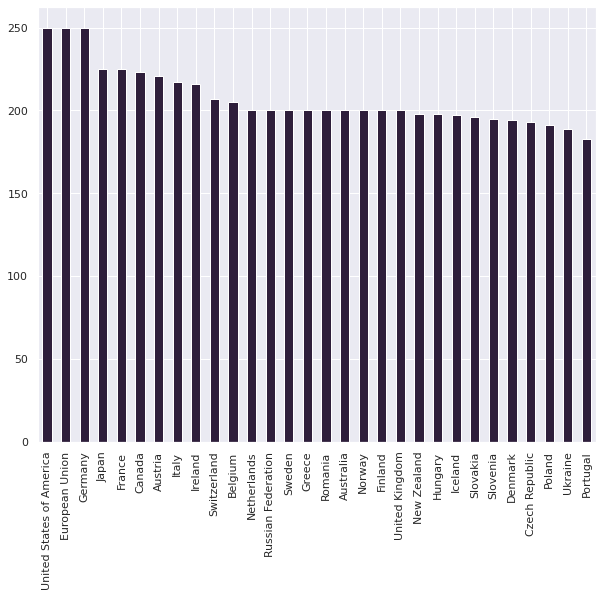

In [4]:
sns.set_theme(style='darkgrid',palette="mako")
plt.figure(figsize=(10,8))
ax=climate_data['country_or_area'].value_counts().head(30).plot(kind='bar')


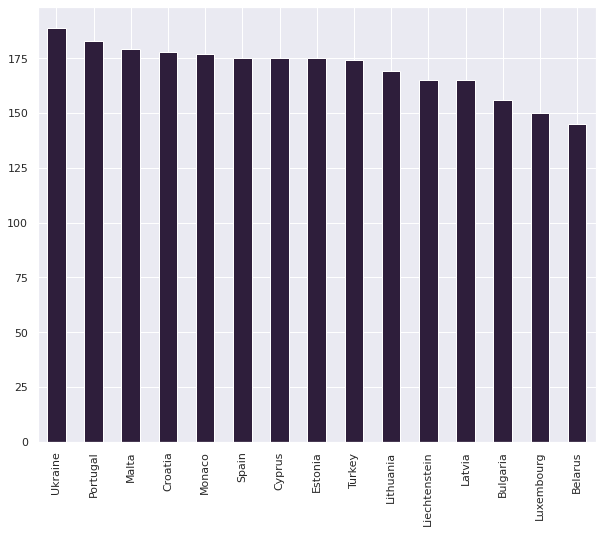

In [5]:
sns.set_theme(style='darkgrid',palette="mako")
plt.figure(figsize=(10,8))
ax=climate_data['country_or_area'].value_counts().tail(15).plot(kind='bar')


# Extracting countries and categories in the df

In [ ]:
#list of categories in the df
categories=list(set(climate_data['category']))
print(categories)
print(len(categories))


#list of all countries in the df
countries=list(set(climate_data['country_or_area']))
print(len(countries))
print(countries)


['methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent', 'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent', 'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent', 'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent', 'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent', 'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent', 'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent', 'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent', 'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent', 'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent']
10
43
['Ireland', 'Austria', 'Finland', 'Malta', 'Slovakia', 'Switzerland', 'Spain', 

In [ ]:
#filtering off some countries
country_list=climate_data['country_or_area'].value_counts().head(25).index
country_list

Index(['Germany', 'European Union', 'United States of America', 'Japan',
       'France', 'Canada', 'Austria', 'Italy', 'Ireland', 'Switzerland',
       'Belgium', 'Russian Federation', 'Norway', 'Greece', 'Australia',
       'United Kingdom', 'Netherlands', 'Finland', 'Romania', 'Sweden',
       'New Zealand', 'Hungary', 'Iceland', 'Slovakia', 'Slovenia'],
      dtype='object')

In [ ]:
#category 1
cat_1=categories[0]
#anakgreget_data=data.loc[data['white_id'] == 'anakgreget' ]
cat_1_df=climate_data.loc[climate_data['category'] == cat_1 ]
cat_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 4072 to 5145
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_or_area  1074 non-null   object 
 1   year             1074 non-null   int64  
 2   value            1074 non-null   float64
 3   category         1074 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 42.0+ KB


Extracting array values

In [ ]:
#extract array values of cat_df
cat_1_df.head(5)
cat_values=cat_1_df['value']
len(cat_values)

1074

Pasting array values to main-df

In [ ]:
#new_df main_df
col_names=list(country_list)
country_data= cat_1_df[cat_1_df.country_or_area .isin(col_names)]


In [7]:
#piecing it all together
final_climate_df=climate_data.pivot_table(index=['country_or_area', 'year'], columns="category", values="value")
final_climate_df.to_csv('final_climate_df.csv')